<a href="https://colab.research.google.com/github/adancalderon/MLintro/blob/main/COMP4980_Winter_2022_SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

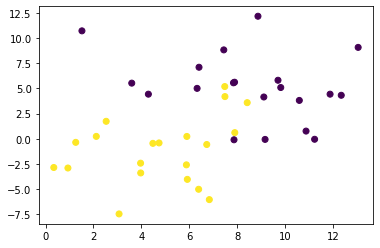

In [ ]:
from sklearn.datasets import make_blobs


X, y = make_blobs(n_samples=40, centers=2, cluster_std=3)

for i in range(len(y)):
  if y[i] == 0:
    y[i] = -1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
plt.scatter(X[:,0], X[:,1], c=y)

# **Linear Support Vector Classifier**

In [ ]:

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.75


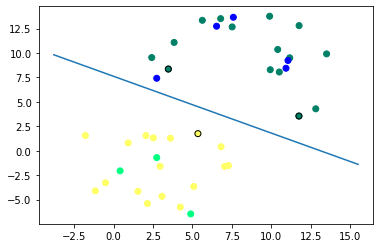

In [ ]:
def dividingLine(x):
  b = clf.intercept_[0]
  w1 = clf.coef_[0,0]
  w2 = clf.coef_[0,1]
  c = -b/w2
  m = -w1/w2
  return m*x + c

plt.scatter( X_train[:,0], X_train[:,1], c = y_train, cmap='summer') 
plt.scatter( X_test[:,0], X_test[:,1], c = y_test, cmap='winter')

xp = np.array( [X[:,0].min()-2, X[:,0].max()+2] )
plt.plot(xp, dividingLine(xp))

plt.scatter( clf.support_vectors_[:,0], clf.support_vectors_[:,1], linewidth=1, facecolors = "none", edgecolors= "k" )

plt.show()

# dark green and yellow points are training data
# blue and light green points are corresponding testing data
# points with black borders are support vectors

# **Linear Support Vector Classifier Code from scratch**

In [ ]:
n = len(X_train)
alpha = 0.0001 # learning rate
C =  1 # regularization factor

X_train = np.array(X_train)
y_train = np.array(y_train)
y_train = y_train.reshape(n,1)

train_f1 = X_train[:,0]
train_f2 = X_train[:,1]
train_f1 = train_f1.reshape(n,1)
train_f2 = train_f2.reshape(n,1)

w1 = 0
w2 = 0
b = 0

epochs = 20000
costs = np.zeros(epochs)

supports = []

for i in range(epochs):
  y = w1 * train_f1 + w2 * train_f2 + b # predicted value
  prod = y * y_train                    # if correct, prod >= 1

  for count in range(n):
    val = prod[count]

    if(val >= 1):
      cost = 0
      w1 = w1 - alpha * C * w1
      w2 = w2 - alpha * C * w2

    else:
      cost = 1 - val
      w1 = w1 - alpha * (C * w1 - train_f1[count] * y_train[count])
      w2 = w2 - alpha * (C * w2 - train_f2[count] * y_train[count])
      b = b + alpha * y_train[count]
    
    costs[i] += cost

    if( i == epochs - 1 ):
      if( val < 1 ):
        supports.append(count)

  if( i % 1000 == 0 ):
    print(costs[i])

32.0
5.57997716316587
2.715281887331227
1.6862756950296742
1.0967771372153154
0.9607717201859718
0.8383890741774855
0.8303081301796218
0.8353216683130091
0.8275187947497455
0.8290233397420221
0.8271440387110973
0.822790662886993
0.824936780454639
0.8240623419545905
0.8196293871956978
0.8120840402497631
0.8201139154473712
0.8089314551706088
0.8126949370940264


Circular Support Vector Classifier

In [ ]:
def genXor(n):
  X_xor = np.random.randn(n,2)
  y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
  y_xor = np.where(y_xor, 1, -1)
  return X_xor, y_xor

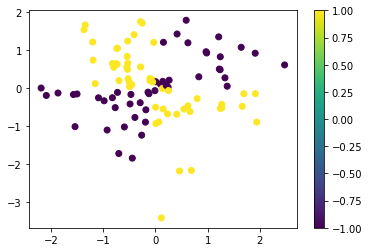

In [ ]:
from sklearn.datasets import make_circles, make_moons
#X, y = make_circles(100, factor=.1, noise=.2)
#X, y = make_moons(100, noise=.1)
X, y = genXor(100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

plt.scatter(X[:,0], X[:,1], c=y)
plt.colorbar()

Illustration of how a new dimension can be added to the data using the other values

In [ ]:
# This function makes the z dimension by selecting
# the larger absolute value of either x or y
z = np.sqrt( np.power(X[:,0],2 ) + np.power(X[:,1],2) )

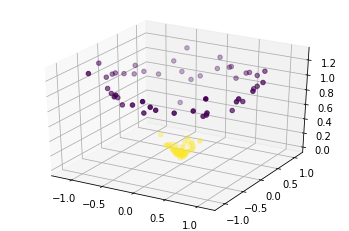

In [ ]:
# drawing the same data in 3D using the new dimension
# note that points near the origin are lower
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0], X[:,1], z, c=y)

In [ ]:
clf = SVC(kernel= 'rbf')#, gamma=0.10, C=0.10)
#clf = SVC(kernel = 'poly', degree=4, gamma=5, C=.5)
#clf = SVC(kernel = 'sigmoid')#, gamma=0.5, C=0.5)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.7


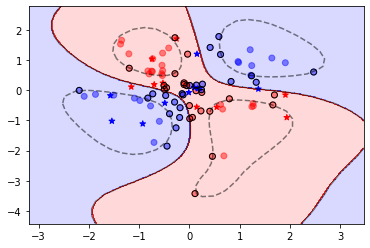

In [ ]:
plot_decision_regions(X_train,y_train,clf)
plt.scatter( X_train[:,0], X_train[:,1], c = y_train, alpha = 0.45, cmap='bwr') 
plt.scatter( X_test[:,0], X_test[:,1], c = y_test, cmap='bwr', marker='*')
plot_svc_decision_function(clf)
plt.scatter( clf.support_vectors_[:,0], clf.support_vectors_[:,1], linewidth=1, facecolors = "none", edgecolors= "k" )
plt.show()

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [ ]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
   x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, 100, alpha=0.15, cmap = 'bwr')
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())